In [15]:
import sys
import os
import scanpy as sc
import pandas as pd

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [16]:
# output from transforming the unfiltered TALON abundanca matrix into 
# a scanpy AnnData object on the transcript level
def get_sc_transcript_adata():
    fname = '../processing/scanpy/sc_transcript_raw.h5ad'
    adata = sc.read(fname)
    
    return adata

# output from transforming the unfiltered TALON abundanca matrix into 
# a scanpy AnnData object
def get_sc_gene_adata():
    fname = '../processing/scanpy/sc_gene.h5ad'
    adata = sc.read(fname)
    
    return adata

def get_tss_adata():
    fname = '../processing/scanpy/sc_tss.h5ad'
    adata = sc.read(fname)
    
    return adata

def get_tes_adata():
    fname = '../processing/scanpy/sc_tes.h5ad'
    adata = sc.read(fname)
    
    return adata

### Number of genes with > 1 isoform / cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.009580225327262978
Slope of MB_nuclei correlation: 0.0018648428880349297
Slope of MT_nuclei correlation: 0.001249855683765882


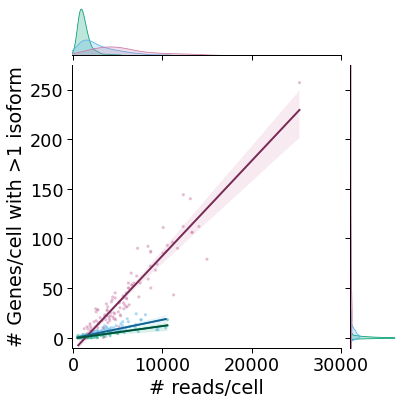

In [28]:
adata = get_sc_transcript_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_sample_colors()
xlim = 30000
ylim = 275
df = plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='iso', opref=opref)

In [29]:
df.head()

,n_genes_multiple_iso,sample,ill_umi_count,ill_gene_count,merged_bc,bc3,bc2,bc1,well,primer_type,raw_bc1,celltype,gene_leiden,gene_n_counts
0.0,31,MB_cells,42834.0,7600.0,TGGAACAAGTGTTCTACGTTCGAG,TGGAACAA,GTGTTCTA,CGTTCGAG,5.0,bc1_dt,CGTTCGAG,MB,3,5933.0
1.0,0,MB_nuclei,16745.0,5317.0,GTACGCAATCCGTCTAACGCCGGC,GTACGCAA,TCCGTCTA,ACGCCGGC,20.0,bc1_dt,ACGCCGGC,MB,2,942.0
2.0,8,MB_nuclei,47072.0,7717.0,AAGAGATCCCGTGAGAACGCCGGC,AAGAGATC,CCGTGAGA,ACGCCGGC,20.0,bc1_dt,ACGCCGGC,MB,1,4077.0
3.0,0,MT_nuclei,10224.0,3849.0,ACTATGCAACACGACCGTGCTAGC,ACTATGCA,ACACGACC,GTGCTAGC,27.0,bc1_dt,GTGCTAGC,MNC,5,708.0
4.0,6,MB_nuclei,56919.0,5760.0,CAATGGAACTAAGGTCGTTCAACA,CAATGGAA,CTAAGGTC,GTTCAACA,19.0,bc1_dt,GTTCAACA,MB,1,7293.0


In [72]:
from urllib.request import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

In [73]:
# subset on columns and remove MT nuclei
df2 = df[['n_genes_multiple_iso', 'sample', 'gene_n_counts']]
df2 = df2.loc[~(df2['sample'] == 'MT_nuclei')]

In [74]:
df2['MB_nuclei'] = 0
df2['MB_cells'] = 0
df2.loc[df2['sample'] == 'MB_nuclei', 'MB_nuclei'] = 1
df2.loc[df2['sample'] == 'MB_cells', 'MB_cells'] = 1
# df2.drop('sample', axis=1, inplace=True)

In [75]:
df2.head()

,n_genes_multiple_iso,sample,gene_n_counts,MB_nuclei,MB_cells
0.0,31,MB_cells,5933.0,0,1
1.0,0,MB_nuclei,942.0,1,0
2.0,8,MB_nuclei,4077.0,1,0
4.0,6,MB_nuclei,7293.0,1,0
5.0,0,MB_nuclei,997.0,1,0


In [77]:
formula = 'n_genes_multiple_iso ~ C(MB_nuclei) + C(MB_cells) + gene_n_counts'
lm = ols(formula, df2).fit()

print(lm.summary())
# results = sm.stats.anova_lm(lm, typ=2)
# print(results)

                             OLS Regression Results                             
Dep. Variable:     n_genes_multiple_iso   R-squared:                       0.805
Model:                              OLS   Adj. R-squared:                  0.803
Method:                   Least Squares   F-statistic:                     519.0
Date:                  Sat, 24 Jul 2021   Prob (F-statistic):           4.37e-90
Time:                          11:00:42   Log-Likelihood:                -1029.6
No. Observations:                   255   AIC:                             2065.
Df Residuals:                       252   BIC:                             2076.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         

In [52]:
calc_iso_complex_sig(df, 'sample', 'MB_cells', 'MB_nuclei')

Mann Whitney U statistic: 1566.0
P value: 1.7641472154188353e-28


Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of 3 correlation: 0.009217922628767684
Slope of 2 correlation: 0.00415607570983559
Slope of 1 correlation: 0.002329957588501765
Slope of 5 correlation: 0.0011909988959094124
Slope of 6 correlation: 0.0007163942375751139
Slope of 7 correlation: 0.0014739933051790657
Slope of 4 correlation: 0.00038527778433623583


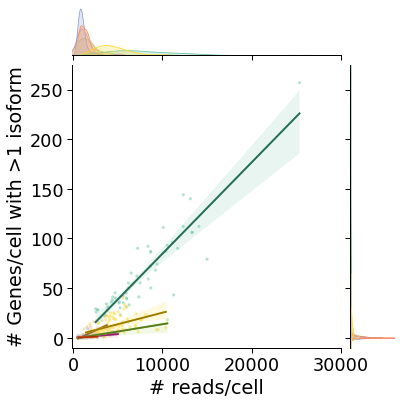

In [5]:
adata = get_sc_transcript_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_lr_cluster_colors()
xlim = 30000
ylim = 275
_ = plot_iso_complexity_vs_reads(adata, gene_adata, 'gene_leiden', xlim, ylim,
                    c_dict, order, how='iso', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB correlation: 0.008322012437306814
Slope of MNC correlation: 0.0009761472971508227
Slope of MT correlation: 0.0013627640189400288


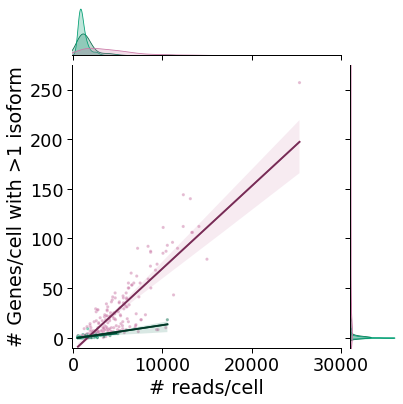

In [6]:
adata = get_sc_transcript_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_condition_colors()
xlim = 30000
ylim = 275
_ = plot_iso_complexity_vs_reads(adata, gene_adata, 'celltype', xlim, ylim,
                    c_dict, order, how='iso', opref=opref)

### Number of genes with >1 TSS / cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.01761262030596631
Slope of MB_nuclei correlation: 0.007880287703592202
Slope of MT_nuclei correlation: 0.006814909879803799


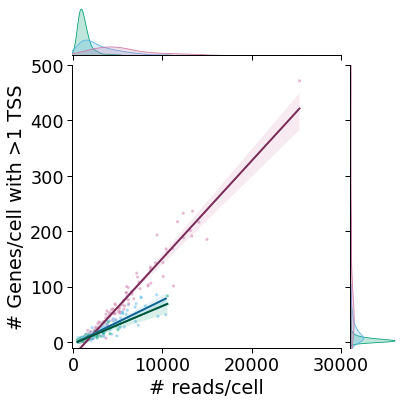

In [7]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_sample_colors()
xlim = 30000
ylim = 500
df = plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='tss', opref=opref)

In [8]:
calc_iso_complex_sig(df, 'sample', 'MB_cells', 'MB_nuclei')

Mann Whitney U statistic: 2677.5
P value: 5.289069537681471e-20


Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of 3 correlation: 0.018509285046935855
Slope of 2 correlation: 0.009628953240820451
Slope of 1 correlation: 0.009078969809322848
Slope of 5 correlation: 0.005668681850390802
Slope of 6 correlation: 0.004399421418093514
Slope of 7 correlation: 0.007419756778083124
Slope of 4 correlation: 0.005452743052360881


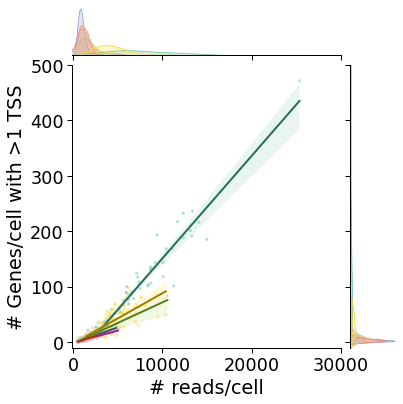

In [9]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_lr_cluster_colors()
xlim = 30000
ylim = 500
_ = plot_iso_complexity_vs_reads(adata, gene_adata, 'gene_leiden', xlim, ylim,
                    c_dict, order, how='tss', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB correlation: 0.01565599389344355
Slope of MNC correlation: 0.005528995381679078
Slope of MT correlation: 0.007147356799419331


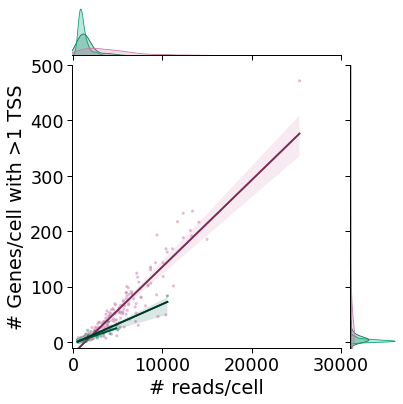

In [10]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_condition_colors()
xlim = 30000
ylim = 500
_ = plot_iso_complexity_vs_reads(adata, gene_adata, 'celltype', xlim, ylim,
                    c_dict, order, how='tss', opref=opref)

### Number of genes w/ >1 TES per cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.004350088135271325
Slope of MB_nuclei correlation: 0.0013329506549818785
Slope of MT_nuclei correlation: 0.0016695366974569992


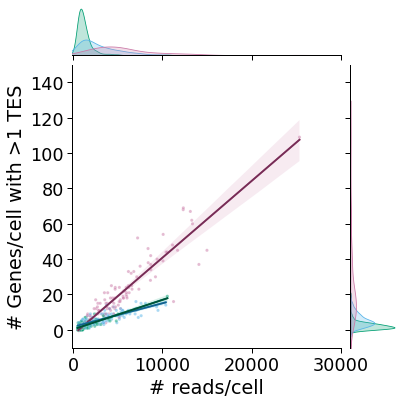

In [11]:
adata = get_tes_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_sample_colors()
xlim = 30000
ylim = 150
df = plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='tes', opref=opref)

In [12]:
calc_iso_complex_sig(df, 'sample', 'MB_cells', 'MB_nuclei')

Mann Whitney U statistic: 1977.5
P value: 3.4977204740050815e-25


Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of 3 correlation: 0.0041291107526927415
Slope of 2 correlation: 0.003237950941113735
Slope of 1 correlation: 0.0015374168493132727
Slope of 5 correlation: 0.0013643155281446405
Slope of 6 correlation: 0.0015642576065609726
Slope of 7 correlation: 0.00164002996895037
Slope of 4 correlation: 0.0015587329489947619


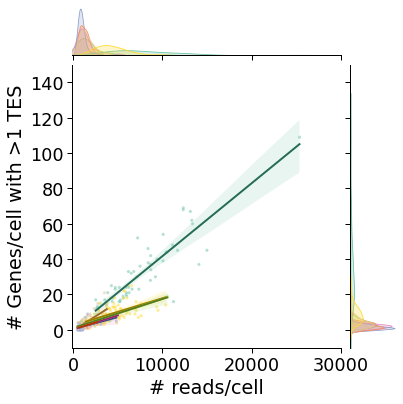

In [13]:
adata = get_tes_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_lr_cluster_colors()
xlim = 30000
ylim = 150
_ = plot_iso_complexity_vs_reads(adata, gene_adata, 'gene_leiden', xlim, ylim,
                    c_dict, order, how='tes', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB correlation: 0.0038941295869646306
Slope of MNC correlation: 0.0014156361283565906
Slope of MT correlation: 0.001672426623224076


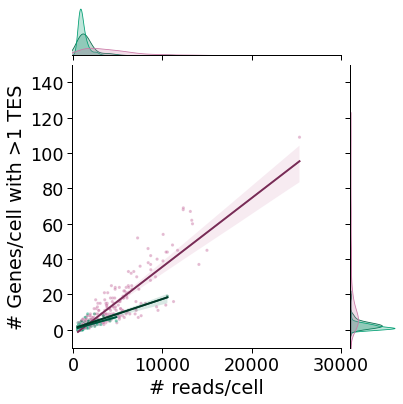

In [14]:
adata = get_tes_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_condition_colors()
xlim = 30000
ylim = 150
_ = plot_iso_complexity_vs_reads(adata, gene_adata, 'celltype', xlim, ylim,
                    c_dict, order, how='tes', opref=opref)